<a href="https://colab.research.google.com/github/manaralbader/ML-Intro/blob/main/day2_Logistic_Regression_Basics_(Unsolved).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="Notebook-Overview"></a>
# Notebook Overview
This notebook provides an introduction to Logistic Regression, a foundational statistical method used for binary classification tasks. The goal is to understand the mathematical concepts, implementation details, and practical applications of Logistic Regression in data science and machine learning. By the end of this notebook, you will have hands-on experience with implementing Logistic Regression from scratch and using libraries like `scikit-learn`.

## Contents of this Notebook
- Overview of Logistic Regression
- Mathematical foundations
- Implementing Logistic Regression from scratch
- Using `scikit-learn` for Logistic Regression
- Model evaluation and metrics
- Practical examples and exercises

## Table of contents
- [Notebook Overview](#notebook-overview)
  - [Contents of this Notebook](#contents-of-this-notebook)
- [Installation of Required Libraries](#installation-of-required-libraries)
- [Importing Libraries](#importing-libraries)
  - [Implementing Logistic Regression from Scratch](#implementing-logistic-regression-from-scratch)
- [Custom Dataset for Logistic Regression](#custom-dataset-for-logistic-regression)
    - [Overview:](#overview:)
  - [Adding Intercept Column for Logistic Regression](#adding-intercept-column-for-logistic-regression)
    - [Purpose:](#purpose:)
  - [Running Optimization for Logistic Regression](#running-optimization-for-logistic-regression)
  - [Evaluating Model Accuracy](#evaluating-model-accuracy)
  - [Visualizing Model Predictions](#visualizing-model-predictions)
    - [Understanding the Confusion Matrix](#understanding-the-confusion-matrix)
  - [Sklearn Implementation](#sklearn-implementation)
    - [About the Iris Dataset](#about-the-iris-dataset)
    - [Train-Test Split](#train-test-split)
    - [Explanation of `train_test_split`](#explanation-of-`train_test_split`)
      - [Key Parameters of `train_test_split`:](#key-parameters-of-`train_test_split`:)
    - [Training the Logistic Regression Model](#training-the-logistic-regression-model)
      - [Steps:](#steps:)
      - [Key Points:](#key-points:)

---

<a id="Installation-Libraries"></a>
# Installation of Required Libraries
To run the code in this notebook, ensure you have the following libraries installed:

- `numpy`: A library for numerical computations, providing support for arrays and mathematical operations.
- `matplotlib`: A plotting library for creating static, interactive, and animated visualizations in Python.
- `scikit-learn`: A library for machine learning, offering simple and efficient tools for data analysis and modeling.
- `tqdm`: A library for creating progress bars to monitor the execution of loops and tasks.

These libraries are essential for data manipulation, visualization, and machine learning.

In [13]:
# Install necessary libraries

## Uncomment the following lines if running in a new environment
%pip install numpy
%pip install scikit-learn
%pip install matplotlib
%pip install tqdm

from IPython.display import clear_output  # Clears notebook output for a clean interface
clear_output()  # Clears the output to avoid clutter.

<a id="Import-Libraries"></a>
# Importing Libraries
This code imports essential libraries for:
- **Math operations**: `math`, `numpy`
- **Visualization**: `matplotlib.pyplot`
- **Progress tracking**: `tqdm`
- **Machine Learning**: `scikit-learn` (for dataset loading, model training, evaluation)

In [14]:
import math  # for mathematical operations
from copy import deepcopy  # for copying objects

import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs

from tqdm import tqdm  # for tracking progress of loops

from sklearn.linear_model import LogisticRegression  # for logistic regression model
from sklearn.datasets import load_iris  # for loading the iris dataset for classification task
from sklearn.model_selection import train_test_split  # for splitting the dataset into training and testing sets
from sklearn.metrics import confusion_matrix  # for calculating confusion matrix for classification task

## Implementing Logistic Regression from Scratch

Before we get to coding, Here's are the equations for logistic regression cost function (cross-entropy) and sigmoid function
</br></br>

Cost function:

$$
Cross\_Entropy\_Loss = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

</br></br>
Sigmoid:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [15]:
def sigmoid(z):
    """
    Apply the sigmoid function to map values into the range (0, 1).
    """
    #hint: 1 / (1 + e^(-z)) , you can use np.exp(value) to get e^(value)
    return 1/(1+np.exp(-z))


def log_reg_cost(y, y_pred, epsilon=1e-15):  # cross entropy
    """
    Calculates and returns the cost for logistic regression.

    Function is slightly different from mentioned above because this one handles batched/vector/multiple inputs (rather than just one).
    This function sums and takes average across the vector.

    Args:
        y (array): True labels (0 or 1).
        y_pred (array): Predicted probabilities (0 to 1).

    Returns:
        float: Average cost.
    """
    # Clip predictions to avoid log(0) errors
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    num_samples = len(y) # number of samples in the dataset (length of y)

    # Calculate the cost (cross-entropy loss)
    # the formula for BCE Loss
    # Hint: -1/m * sum(y log(y_hat) + (1 - y) log(1- y_hat))
    cost = -1/num_samples * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) # when clipping is not granted to be done
    return cost


def log_reg_gradient_descent(X, y, learning_rate, n_iters=500):
    """
    Runs gradient descent (param optimization) for logistic regression and returns optimized weights.

    Args:
        X (array): Feature matrix (num_samples x num_features).
        y (array): Labels (0 or 1).
        learning_rate (float): Step size for updates.
        n_iters (int): Number of iterations.

    Returns:
        array: Optimized weights.
    """
    num_samples, num_features = X.shape
    weights = np.zeros(num_features)  # Initialize weights to zeros

    losses = [] # Track loss values over iterations

    for _ in tqdm(range(n_iters)): # Loop through the number of iterations

        # Predict using current weights
        z = np.dot(X, weights)
        y_pred = sigmoid(z)

        # Compute gradient and update weights
        gradient = np.dot(X.T, (y_pred - y)) / num_samples
        #apply gradient descent weights_n_1 = weitghts_n - gradient * lr
        weights -= gradient * learning_rate # Update weights using gradient descent

        # Record cost for analysis
        # calculate the loss
        loss = log_reg_cost(y, y_pred) # Calculate loss using current weights
        losses.append(loss) # Append loss to losses list for tracking

    # Plot the loss curve
    plt.plot(losses)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Iterations")
    plt.show()

    return weights

# Custom Dataset for Logistic Regression

### Overview:
1. **Generate Random Points**:
   - 400 points scaled to a max value of 100.

2. **Define Boundary**:
   - A sinusoidal curve separates two classes.

3. **Assign Labels**:
   - `Class 1` (label = 1): Points above the boundary.
   - `Class 0` (label = 0): Points below the boundary.

4. **Visualize**:
   - Red: Class 1
   - Blue: Class 0
   - Curve: Decision boundary

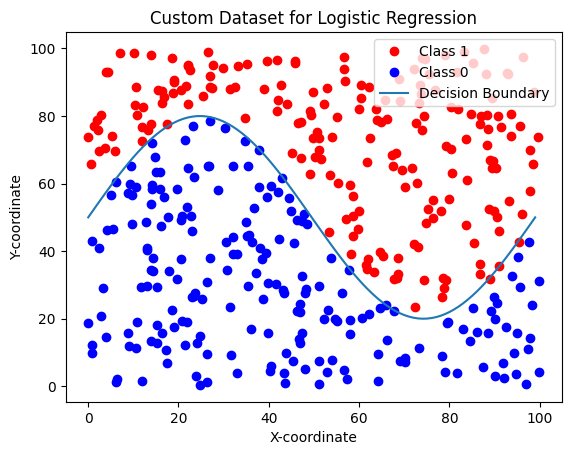

In [16]:
# Generate a custom dataset for our logistic regression model

# Define dataset parameters
n_points = 400  # num of points in generated data
max_coordinate_value = (
    100  # max possible value taken by the x or y coordinate of a point
)

# Generate random 2D points
points = np.random.rand(n_points, 2) * max_coordinate_value

# Define a sinusoidal boundary for classification
boundary = np.sin(2 * math.pi * (points[:, 0] / max_coordinate_value))
boundary = (boundary * 0.3 * max_coordinate_value) + (max_coordinate_value / 2)


# Classify points based on their position relative to the boundary
mask = points[:, 1] > boundary  # True if above boundary, False otherwise
labels = np.zeros(n_points)  # Initialize all labels as 0
labels[mask] = 1  # Assign label 1 to points above the boundary

# Create a divider line for visualization purposes only (not used in the model)
divider = 30 * np.sin( 2 * math.pi * np.linspace(0, max_coordinate_value, max_coordinate_value) / max_coordinate_value)
divider += max_coordinate_value / 2


# Plot the points and the divider
plt.plot(
    points[mask][:, 0], points[mask][:, 1], "ro", label="Class 1"
)  # Points above boundary
plt.plot(
    points[~mask][:, 0], points[~mask][:, 1], "bo", label="Class 0"
)  # Points below boundary
plt.plot(divider, label="Decision Boundary")  # The sinusoidal boundary for reference

# Add plot labels and show the plot
plt.legend()
plt.title("Custom Dataset for Logistic Regression")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

## Adding Intercept Column for Logistic Regression

### Purpose:
- Logistic regression requires a bias term (intercept) for better flexibility in separating classes.
- Adding a column of `1s` to the features (`X`) allows the model to learn this bias.

In [17]:
# rename to X and y.

X = points  # features {(x, y) coordinates}
y = labels  # targets (0 or 1)

# Display the current shape of X
print(f"Current X shape: {X.shape}")

# Add an intercept column (column of 1s) for the bias term
intercept_col = np.ones(X.shape[0])  # Create a column of 1s with the same number of samples as X
X = np.column_stack((X, intercept_col))  # Add the column to X

# Display the new shape of X
print(f"New X shape: {X.shape}. Extra col added for intercept value")

Current X shape: (400, 2)
New X shape: (400, 3). Extra col added for intercept value


## Running Optimization for Logistic Regression

- Perform gradient descent to optimize weights (`theta`) for logistic regression.

100%|██████████| 30000/30000 [00:02<00:00, 11323.82it/s]


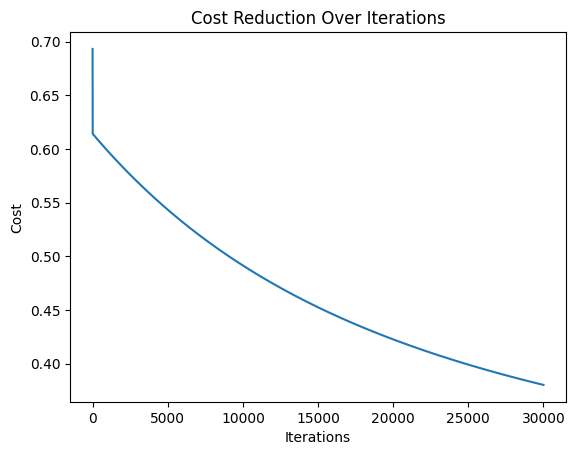

In [18]:
# Run Optimization

# Set hyperparameters
lr = 1e-3  # learning rate
num_iters = 30000  # number of iterations

# Run gradient descent to get optimized weights
weights = log_reg_gradient_descent(X, y, lr, num_iters)  # get optimized weights

In [19]:
# Display the optimized weights (coefficients) for the model
print(f"Optimized weights: {weights}")

Optimized weights: [ 0.01116359  0.04522017 -2.58005656]


## Evaluating Model Accuracy

- Calculate predictions using the optimized weights (`weights`).
- Evaluate the accuracy of the logistic regression model by comparing predictions to actual labels.

In [20]:
# Predict using the optimized weights
y_pred = sigmoid(np.dot(X, weights))  # Compute predicted probabilities (0 to 1)
y_pred = np.round(y_pred)  # Convert probabilities to binary labels (0 or 1)

# Display the predicted labels and true labels for comparison
correct_mask = (
    y_pred == y
)  # Mask of correct predictions (True for correct, False for incorrect)
correct_count = correct_mask.sum()  # Count of correct predictions (True values)
total_count = len(y_pred)  # Total number of predictions

# Print accuracy of the model
print(f"The model predicted {correct_count} out of {total_count} predictions correctly")
print(f"The Accuracy is {correct_count/total_count} ({correct_count/total_count*100}%)")

The model predicted 335 out of 400 predictions correctly
The Accuracy is 0.8375 (83.75%)


## Visualizing Model Predictions

- Visualize the predictions of the logistic regression model.
- Highlight correctly and incorrectly predicted points.

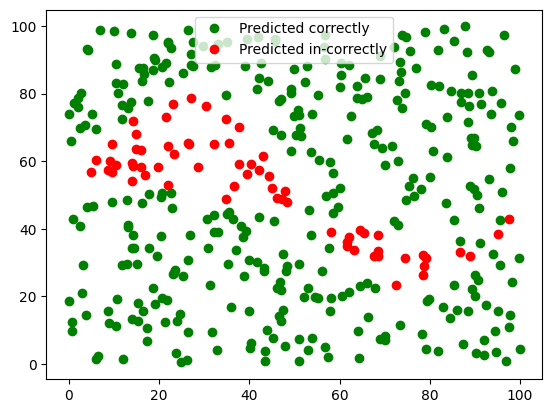

In [21]:
# Plot the data and the decision boundary for the logistic regression model with optimized weights
plt.plot(
    X[correct_mask][:, 0], X[correct_mask][:, 1], "go", label="Predicted correctly"
)  # Plot points with correct predictions
plt.plot(
    X[~correct_mask][:, 0], X[~correct_mask][:, 1], "ro", label="Predicted in-correctly"
)  # Plot points with incorrect predictions

# Add legend and display the plot
plt.legend()
plt.show()

---
---
---

### Understanding the Confusion Matrix

Before we move on, let's also take a look at confusion matrix

The **confusion matrix** is a way to summarize the performance of a classification model. It shows the following structure:

|                | Predicted Positive | Predicted Negative |
|----------------|---------------------|---------------------|
| **Actual Positive** | True Positive (TP)      | False Negative (FN)     |
| **Actual Negative** | False Positive (FP)     | True Negative (TN)      |

Each term means the following:

- **True Positive (TP):** Number of actual positive labels correctly predicted as positive.
- **False Positive (FP):** Number of actual negative labels incorrectly predicted as positive.
- **False Negative (FN):** Number of actual positive labels incorrectly predicted as negative.
- **True Negative (TN):** Number of actual negative labels correctly predicted as negative.


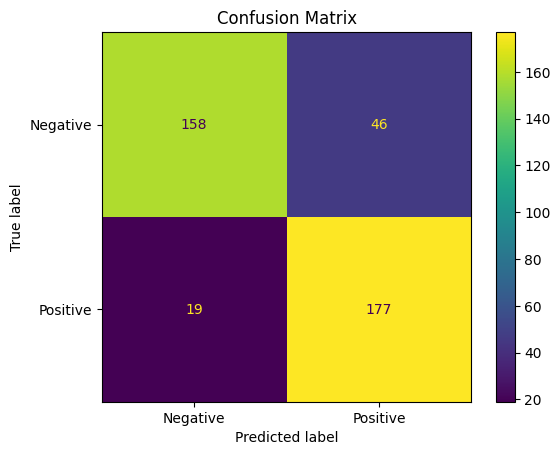

In [22]:
# Import necessary library for displaying the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y, y_pred)

# Display the confusion matrix with labels for better understanding
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"]).plot()

# Add a title for clarity
plt.title("Confusion Matrix")
plt.show()

In [23]:
# the following line should be enough to get the confusion matrix if you want to keep it simple
confusion_matrix(y, y_pred)

array([[158,  46],
       [ 19, 177]])

---

## Sklearn Implementation

Let's implement logistic regression on a famous dataset, the **Iris dataset**.


### About the Iris Dataset

The Iris dataset is used for classifying flowers based on the measurements of their parts.

- **Features**: Petal and sepal length and width.
- **Target**: The flower species.

Although the dataset has more than 3 classes, we'll simplify the task by selecting one class and predicting **whether a flower belongs to that class or not** (binary classification).


### Train-Test Split

To evaluate our model, we'll split the data into two parts:

- **Training Data**: Used to train the model.
- **Test Data**: Used to assess how well the model generalizes to unseen data.

This practice helps us avoid overfitting and ensures the model performs well on new inputs.

In [25]:
# Import the necessary library
from sklearn.datasets import load_iris # iris is a dataset about flowers

# Load the Iris dataset
iris_data = (load_iris())  # This function returns a dictionary-like object containing the dataset

# Print the keys of the dataset to understand its structure
print(f"Keys in the Iris dataset: {list(iris_data.keys())}\n")

# Display the features (input variables) and target (class labels)
print(f"Features (flower measurements): {iris_data['feature_names']}\n")
print(f"Target classes (flower species): {iris_data['target_names']}\n")

Keys in the Iris dataset: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']

Features (flower measurements): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes (flower species): ['setosa' 'versicolor' 'virginica']



In [36]:
# Those are the given details. We're  concerned about 'data' (containing features of flowers) and target (containing classes)

import numpy as np

# Extract features (X) and target classes (y) from the dataset
X = np.array(iris_data["data"])  # Features: Measurements of flowers
y = np.array(iris_data["target"])  # Target: Class labels of flowers

# Display the initial shape of X and y for context
print(f"Feature matrix shape (X): {X.shape}")
print(f"Target vector shape (y): {y.shape}\n")

# Note: The data is sorted by class labels in y. We need to shuffle it for better training and testing.

# Generate a list of indices corresponding to the dataset
shuffled_idxs = list(range(len(y)))

# Shuffle the indices to randomize the data
np.random.shuffle(shuffled_idxs)

# Rearrange X and y based on the shuffled indices, we shuffled to make sure that all sort of data arre see
X = X[shuffled_idxs]
y = y[shuffled_idxs]

# Verify the data has been shuffled
print(f"First 5 rows of shuffled features (X):\n{X[:5]}")
print(f"First 5 shuffled target values (y): {y[:5]}")

Feature matrix shape (X): (150, 4)
Target vector shape (y): (150,)

First 5 rows of shuffled features (X):
[[6.7 3.1 4.4 1.4]
 [5.  3.5 1.3 0.3]
 [4.4 3.  1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [6.1 2.8 4.  1.3]]
First 5 shuffled target values (y): [1 0 0 0 1]


In [27]:
y

array([0, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 0, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 0,
       1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [28]:
# Display the shape of the features matrix and target vector
print(
    f"Feature matrix shape (X): {X.shape} -----> (Rows: {X.shape[0]}, Columns: {X.shape[1]})"
)
print(f"Target vector shape (y): {y.shape} -----> (Total samples: {y.shape[0]})\n")

# Display the unique class labels in the target vector
unique_classes = np.unique(y)
print(f"Unique class labels in the target (y): {unique_classes}")

Feature matrix shape (X): (150, 4) -----> (Rows: 150, Columns: 4)
Target vector shape (y): (150,) -----> (Total samples: 150)

Unique class labels in the target (y): [0 1 2]


In [29]:
# The next step after getting your hands on a dataset might normally be EDA, but we'll skip that.

# Prepare the target vector for binary classification
# The task: Predict if a flower is "Setosa" (class 0) or not.

# Step 1: Temporarily assign a placeholder value (-1) to 'Setosa' class (class 0)
y[y == 0] = -1  # Replace Setosa class (0) with -1 for clarity during transformations

# Step 2: Convert all non-Setosa classes (classes 1 and 2) to 0
y[y > 0] = 0  # Flowers that are not Setosa are now labeled as 0

# Step 3: Convert the placeholder value (-1) back to 1 for the Setosa class
y[y == -1] = 1  # Flowers that are Setosa are now labeled as 1

# hence it's a binary problem

# Verify the transformation
print(f"Unique class labels in the target (y) after transformation: {np.unique(y)}")
print(f"First 10 target values (y): {y[:10]}")

Unique class labels in the target (y) after transformation: [0 1]
First 10 target values (y): [1 0 1 0 0 0 1 0 0 1]


In [30]:
y  # 0 is replaced with 1 and non-0 are now 0

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

### Explanation of `train_test_split`

The `train_test_split` function is used to divide a dataset into two parts: **training data** and **testing data**. This separation ensures the model is trained on one set of data and evaluated on another, helping to assess its generalization to unseen data.


#### Key Parameters of `train_test_split`:
1. **`stratify`**:
   - Ensures the specified column (e.g., `y`) has the same proportion of each class in both the training and testing sets.
   - In our example:
     - If 1/3 of the total data belongs to class `1` and 2/3 belongs to class `0`, stratifying by `y` ensures this ratio is maintained in both `y_train` and `y_test`.

2. **`random_state`**:
   - Ensures reproducibility by controlling the random number generator used to split the data.
   - Using the same `random_state` ensures the split is the same every time you run the code.

3. **`train_size`**:
   - Specifies how much of the data should be used for training.
   - In our example, `train_size=0.7` means 70% of the data is used for training, and the remaining 30% is used for testing.


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=123, train_size=0.7
)

In [32]:
# Verify the shapes of the resulting datasets
print(f"Training feature matrix shape (X_train): {X_train.shape}")
print(f"Testing feature matrix shape (X_test): {X_test.shape}")
print("-" * 30)
print(f"Training target vector shape (y_train): {y_train.shape}")
print(f"Testing target vector shape (y_test): {y_test.shape}\n")

# Verify the class distribution in the training and testing sets
print(f"Class distribution in training set (y_train): {np.bincount(y_train)}")
print(f"Class distribution in testing set (y_test): {np.bincount(y_test)}")

Training feature matrix shape (X_train): (105, 4)
Testing feature matrix shape (X_test): (45, 4)
------------------------------
Training target vector shape (y_train): (105,)
Testing target vector shape (y_test): (45,)

Class distribution in training set (y_train): [70 35]
Class distribution in testing set (y_test): [30 15]


---

### Training the Logistic Regression Model

In this section, we will train a **Logistic Regression model** using the training data.

#### Steps:
1. **Model Initialization**:
   - We will create an instance of the `LogisticRegression` class, which represents our logistic regression model.

2. **Training the Model**:
   - Using the `fit` method, we will train the model on the **training data** (`X_train` and `y_train`).
   - During this process, the model learns the relationship between the features (`X_train`) and the target labels (`y_train`).

#### Key Points:
- Training is performed only on the **training data** to ensure the model is evaluated on unseen data (`X_test`).
- After training, the model will be ready to make predictions on new or unseen data.



In [34]:
# Step 1: Initialize the Logistic Regression model
model = LogisticRegression()

# Step 2: Train the model using the training data
model.fit(X_train, y_train)  # we train on training data only

# Verify training success by displaying model coefficients and intercept
print("Model trained successfully!")
print(f"Model coefficients (weights): {model.coef_}")
print(f"Model intercept: {model.intercept_}")

Model trained successfully!
Model coefficients (weights): [[-0.39370026  0.86248747 -2.1410159  -0.90599045]]
Model intercept: [5.99698491]


In [35]:
# Step 1: Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Step 2: Display the first few predictions for verification
print(f"First 10 predicted labels: {y_pred[:10]}")
print(f"First 10 actual labels:    {y_test[:10]}")

# Step 3: Verify the shape of the predictions to ensure it matches the test data
print(f"Shape of predicted labels (y_pred): {y_pred.shape}")

First 10 predicted labels: [0 0 1 1 0 0 0 0 0 1]
First 10 actual labels:    [0 0 1 1 0 0 0 0 0 1]
Shape of predicted labels (y_pred): (45,)


In [37]:
# Step 1: Compare predictions with actual labels
# Create a boolean mask where predictions match the actual test labels
correct_mask = y_pred == y_test

# Step 2: Calculate the number of correct predictions
correct_count = correct_mask.sum()

# Step 3: Calculate the total number of predictions
total_count = len(y_pred)

# Step 4: Compute the accuracy
accuracy = correct_count / total_count

# Step 5: Display the results
print(f"The model predicted {correct_count} out of {total_count} correctly.")
print(f"Accuracy: {accuracy:.2f} -----> ({accuracy*100:.2f}%)")

The model predicted 45 out of 45 correctly.
Accuracy: 1.00 -----> (100.00%)


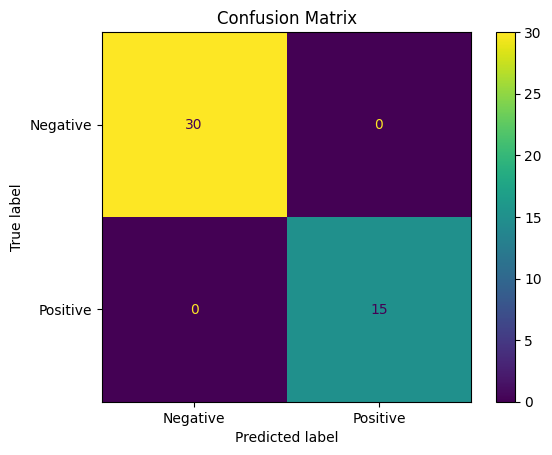

In [38]:
# Import necessary library for displaying the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with labels for better understanding
ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=["Negative", "Positive"]
).plot()

# Add a title for clarity
plt.title("Confusion Matrix")
plt.show()

---

# Summary

- **What is Logistic Regression?**
  - Logistic regression is used for classification problems, predicting discrete outcomes based on input features.
  - It outputs probabilities to classify data into categories.

- **Core Concepts Explained:**
  - **Cost Function:** How the model evaluates its predictions and improves during training.
  - **Optimization:** Techniques like gradient descent used to minimize the cost function.

- **Practical Implementations:**
  - Building logistic regression from scratch using Python.
  - Adding intercept columns and running optimization for better model performance.
  - Visualizing decision boundaries to understand classification.

- **Evaluating Model Performance:**
  - Metrics like accuracy, confusion matrix, and loss functions.
  - Understanding how to interpret model results.

- **Using Sklearn for Logistic Regression:**
  - Applying logistic regression on the Iris dataset.
  - Splitting data into training and testing sets with `train_test_split`.
  - Training and evaluating models with a practical, hands-on approach.

- **Visualization:**
  - Graphical representation of predictions and decision boundaries.
  - Insights into model behavior through plots and metrics.
